#Introduction to Data Science for Librarians
By Sarah W. Sutton, Ph.D.

## Chapter 4 - Preparing Data for Analysis

### Chapter 4 Contents

4.1 Introduction

4.2 Data Cleansing

4.3 Data Transformation

Exercise 4.1

4.4 Conclusion



### 4.1 Introduction

This chapter begins a deep dive into the uses of data science techniques in libraries in the next few chapters. Rather than begin with obtaining data, the first step in the data lifecycle, we begin with a closer look at, arguably, the most important step in using data because knowing what our data must look like in order for us to conduct an analysis is increadibly helpful in all of the stages its lifecycle. Knowing what type, amount, and format of data is needed to answer a research question allows us to more efficiently obtain only the data we really need, whether we're using existing data or collecting new data. That step is data cleansing and it is estimated to make up to 80% of a data scientists time (Sarih et al., 2019).

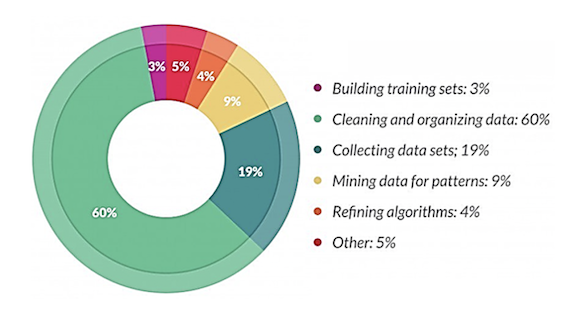

(Sarih et al., 2019)

### 4.2 Data Cleansing

Data cleansing is simply cleaning and organizing data so that they can be manipulated and analyzed. It "refers to the process of identifying errors, anomalies, and inconsistencies in the dataset" (Amit, 2024). Consider a spreadsheet that contains the names and addresses of the people to whom I regularly send Christmas cards. My spreadsheet includes the dates on which I sent and recieved cards from each person. It is important to me to be able to sort my spreadsheet by date so that I can tell who I haven't heard from in a while. But, sometimes I am inconsistent in the way I enter my dates. One year I might use MM-DD-YY, the next I might use MM-DD-YYYY, and back when I started my sheet, I might have used Month Day, Year. When I try to sort (organize) my spreadsheet by the date I last received a card from someone, the sort will not be correct if I've used multiple different formats for those dates! In order to get a correctly sorted list, I have to clean up those dates so they are all expressed in the same way. Voila! Data cleansing!

Cleansing data is imperitive because messy data can create skewed or even false results. It is also time consuming and many data scientists' least favorite part of the reseach process (Press, 2013). So, what is messy data? It is not just data in conflicting formats as was the case in my spreadsheet example. It can also include missing data points, duplicate data points, and even incorrect data points.

### Steps for cleansing data

There are a few, basic steps to cleansing data. What they look like in specific practice will vary depending on the type of data, but in general they are:

1. Managing duplicate data. Duplicates should generally be removed.
2. Managing missing data. What to do about missing values depends on the type of data, the size of the data set, and the number of data points that are missing.
3. Standardizing data formats. As in the Christmas card dates example, it is usually a good idea to ensure that all data points for a particular variable are expressed the same way.
4. Managing outliers. Outliers are data points that appear very different from the majority of data points for a given variable. Their management may include determining whether they are errors and whether to ignore them, both of which depend on the type of date and size of the data set.



### 4.3 Data Transformation

Data transformation is related to but slightly different from data cleansing. Sometimes raw data may not come in the form needed for the tests the researcher wishes to perform. "Data transformation refers to formatting, restructuring, and modifying the original data to a more suitable or recommeneded format" (Amit, 2024). For instance, certain statistical tests can only be performed effectively on certain types of data. This means that raw data may need to be transformed from one type to another.

Data transformation differs from data cleansing in that it applied to data that is already ready for (e.g. already cleansed) analysis. One example of data transformation is performing mathematical operations such as applying a logarithm to a numerial (ratio) variable in order to obtain values that can be plotted on a normal distribution because a normal distribution* is a requirement for a number of statistical operaions. But before such a transformation is performed, the data should be clean, e.g. free of duplicates, missing values and outliers dealt with, and standardized in format.
___

* A normal distribution is a probability distribution that is symetrical around the mean creating a bell shaped curve when graphed.

### Exercise 4.1 Simple Data Cleansing

Most data cleansing can be programmed. In this exercise, we will practice cleansing data using pre-written Python code.

For this simple data cleansing exercise, we'll use the weather data for Emporia KS in October 2024. To start with, we'll load the data from the .csv file we created in the exercises in chapter 2, which I've modified slightly for this exercise. Download it from [Oct_temps_modified.csv](https://github.com/sarahwsutton/Introduction_to_datascience_for_librarians/blob/main/Oct_temps_modified.csv.). Upload it to either you Colab temporary files or your Google Drive, then copy the file path and enter it below.

In [19]:
import pandas as pd

# IF your file is stored in your Google drive, Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Paste the file path between the quotation marks
file_path = '/content/Oct_temps_modified.csv'

try:
  df = pd.read_csv(file_path)
  print("File loaded successfully.")
  # You can now work with the DataFrame 'df'
  print(df.head()) # Print the first few rows to check
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


File loaded successfully.
  Time Temperature (°F) Unnamed: 2 Unnamed: 3 Dew Point (°F) Unnamed: 5  \
0  Oct              Max        Avg        Min            Max        Avg   
1    1               71       61.5         45             41       35.3   
2    2               79       56.5          0             46       39.9   
3    3               92       73.2         56             60       54.4   
4    4               81       67.8         59             58       54.5   

  Unnamed: 6 Humidity (%) Unnamed: 8 Unnamed: 9 Wind Speed (mph) Unnamed: 11  \
0        Min          Max        Avg        Min              Max         Avg   
1         32           82       40.5         26               17         9.8   
2          0           93       57.1          0               16         5.9   
3         47           80         55         29               16         8.4   
4         47           87       64.1         44               14         4.9   

  Unnamed: 12 Pressure (in) Unnamed: 14 Un

Notice the first column in the dataframe, this column is called the index although that label doesn't appear at the top of the column. It contains a unique numerical label for each row of the dataframe. No matter how we might sort this dataframe, the row number "goes with" the row it is first assigned to.

Also notice that the first row is numbered "0." This is a Python convention. It's important to be aware of this when we start counting the total number of rows in our dataframe.

Let's check to see how many rows are in our dataframe.

In [20]:
len(df)


32

Notice the the 32 rows is correct because we know that October has 31 days and we see that the first row below the column names contains some text. This happened because the .csv file we loaded into our dataframe had two rows of column labels. It means that we have one row for weather data for each of the 31 days in October plus that extra row of text.

This is the first thing we're going to clean up in our dataframe. We'll do that by giving our columns more understandable labels and getting rid of that extra row of text.

In [21]:
# prompt: RENAME THE COLUMNS IN DF using Oct,MaxTemp,AvgTemp,MinTemp,MaxDP,AvgDP,MinDP,MaxHumidity,AvgHumidity,MinHumidity,MaxWind,AvgWind,MinWind,MaxPressure,AvgPressur,MinPressure,TotalPrecip

import pandas as pd

# Assuming df is already loaded as in your previous code
new_columns = ['Oct','MaxTemp','AvgTemp','MinTemp','MaxDP','AvgDP','MinDP','MaxHumidity','AvgHumidity','MinHumidity','MaxWind','AvgWind','MinWind','MaxPressure','AvgPressur','MinPressure','TotalPrecip']
df.columns = new_columns
print(df.head())


   Oct MaxTemp AvgTemp MinTemp MaxDP AvgDP MinDP MaxHumidity AvgHumidity  \
0  Oct     Max     Avg     Min   Max   Avg   Min         Max         Avg   
1    1      71    61.5      45    41  35.3    32          82        40.5   
2    2      79    56.5       0    46  39.9     0          93        57.1   
3    3      92    73.2      56    60  54.4    47          80          55   
4    4      81    67.8      59    58  54.5    47          87        64.1   

  MinHumidity MaxWind AvgWind MinWind MaxPressure AvgPressur MinPressure  \
0         Min     Max     Avg     Min         Max        Avg         Min   
1          26      17     9.8       0        29.2       29.1          29   
2           0      16     5.9       0          29       28.9        28.7   
3          29      16     8.4       0        28.9       28.8        28.7   
4          44      14     4.9       0          29         29        28.9   

  TotalPrecip  
0       Total  
1           0  
2           0  
3           0  
4     

In [22]:
# prompt: remove row 0 in df

df = df.drop(0)
print(df.head())


  Oct MaxTemp AvgTemp MinTemp MaxDP AvgDP MinDP MaxHumidity AvgHumidity  \
1   1      71    61.5      45    41  35.3    32          82        40.5   
2   2      79    56.5       0    46  39.9     0          93        57.1   
3   3      92    73.2      56    60  54.4    47          80          55   
4   4      81    67.8      59    58  54.5    47          87        64.1   
5   5      92    73.3      54    60  55.6    52          97        59.7   

  MinHumidity MaxWind AvgWind MinWind MaxPressure AvgPressur MinPressure  \
1          26      17     9.8       0        29.2       29.1          29   
2           0      16     5.9       0          29       28.9        28.7   
3          29      16     8.4       0        28.9       28.8        28.7   
4          44      14     4.9       0          29         29        28.9   
5          27      29    10.8       0        28.9       28.9        28.8   

  TotalPrecip  
1           0  
2           0  
3           0  
4           0  
5           

In [23]:
print(len(df))


31


Great! Now we have 31 rows!

Now we can start working through the steps described earlier in this chapter for cleansing data. First up is checking for duplicates. In this case, we're looking at weather data for each of the 31 days in October 2024. That tells us that the column that has to be checked for duplicates is column called "Oct."

In [24]:
# prompt: # prompt: check for duplicates in df column Oct

# Check for duplicate values in the 'Oct' column
duplicates_in_oct = df['Oct'].duplicated()

# Print rows where 'Oct' has duplicates
print("Rows with duplicate values in 'Oct' column:")
print(df[duplicates_in_oct])

# To get a count of duplicate values in the 'Oct' column
print("\nNumber of duplicate values in 'Oct' column:", duplicates_in_oct.sum())

Rows with duplicate values in 'Oct' column:
Empty DataFrame
Columns: [Oct, MaxTemp, AvgTemp, MinTemp, MaxDP, AvgDP, MinDP, MaxHumidity, AvgHumidity, MinHumidity, MaxWind, AvgWind, MinWind, MaxPressure, AvgPressur, MinPressure, TotalPrecip]
Index: []

Number of duplicate values in 'Oct' column: 0



Great, no duplicates! Next, we'll look for missing data in our dataframe.

In [25]:
# prompt: find missing data in df

# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Alternatively, check for missing values in the entire DataFrame
missing_values_total = df.isnull().sum().sum()
print(f"\nTotal missing values in the DataFrame: {missing_values_total}")


Oct            0
MaxTemp        3
AvgTemp        0
MinTemp        0
MaxDP          0
AvgDP          0
MinDP          0
MaxHumidity    0
AvgHumidity    0
MinHumidity    0
MaxWind        0
AvgWind        0
MinWind        0
MaxPressure    0
AvgPressur     0
MinPressure    0
TotalPrecip    0
dtype: int64

Total missing values in the DataFrame: 3


The result shows that there are 3 missing values in our dataframe and that they're all in the column "MaxTemp."

Next we need to know which rows the missing values are in.

In [27]:
# prompt: find missing data in df in MaxTemp

# Check for missing values in 'MaxTemp' column
missing_maxtemp = df['MaxTemp'].isnull().sum()
print(f"Number of missing values in 'MaxTemp': {missing_maxtemp}")

# Display rows with missing 'MaxTemp' values
missing_maxtemp_rows = df[df['MaxTemp'].isnull()]
print("\nRows with missing 'MaxTemp' values:")
missing_maxtemp_rows


Number of missing values in 'MaxTemp': 3

Rows with missing 'MaxTemp' values:


,Oct,MaxTemp,AvgTemp,MinTemp,MaxDP,AvgDP,MinDP,MaxHumidity,AvgHumidity,MinHumidity,MaxWind,AvgWind,MinWind,MaxPressure,AvgPressur,MinPressure,TotalPrecip
8,8,NaN,59.1,45,45,39.4,33,90,55.7,21,7,2.7,0,29,28.9,28.9,0
9,9,NaN,62.0,43,45,41.6,38,89,54.1,21,9,4.3,0,28.9,27.6,0,0
21,21,NaN,64.3,44,45,39.8,37,79,44.8,23,22,9.9,0,29.1,29,28.8,0


The results show values in rows 8, 9, and 21 of the MaxTemp column are "NaN," in many programming languages including Python, NaN stands for not a number. In this case, Python is telling us that rows 8, 9, and 21 contain missing values.

How to handle missing values depends on your data, what you know about your data, what manipulations you're going to do to it in your analysis, and how much data you have. In this case, because we have a column for AvgTemp and MinTemp, we could calculate the missing MaxTemp values.

In [28]:
# prompt: calculate missing MaxTemp using AvgTemp value for mean and MinTemp for lower value

# Assuming df is already loaded and processed as in the previous code

# Convert 'AvgTemp' and 'MinTemp' columns to numeric type
df['AvgTemp'] = pd.to_numeric(df['AvgTemp'])
df['MinTemp'] = pd.to_numeric(df['MinTemp'])

# Calculate missing 'MaxTemp' values using 'AvgTemp' and 'MinTemp'
for index in missing_maxtemp_rows.index:
    avg_temp = df.loc[index, 'AvgTemp']
    min_temp = df.loc[index, 'MinTemp']
    df.loc[index, 'MaxTemp'] = 2 * avg_temp - min_temp

# Verify that there are no more missing values in 'MaxTemp'
missing_maxtemp_after = df['MaxTemp'].isnull().sum()
print(f"\nNumber of missing values in 'MaxTemp' after imputation: {missing_maxtemp_after}")

# Display the updated DataFrame (optional)
print("\nUpdated DataFrame:")
df


Number of missing values in 'MaxTemp' after imputation: 0

Updated DataFrame:


,Oct,MaxTemp,AvgTemp,MinTemp,MaxDP,AvgDP,MinDP,MaxHumidity,AvgHumidity,MinHumidity,MaxWind,AvgWind,MinWind,MaxPressure,AvgPressur,MinPressure,TotalPrecip
1,1,71,61.5,45,41,35.3,32,82,40.5,26,17,9.8,0,29.2,29.1,29,0
2,2,79,56.5,0,46,39.9,0,93,57.1,0,16,5.9,0,29,28.9,28.7,0
3,3,92,73.2,56,60,54.4,47,80,55,29,16,8.4,0,28.9,28.8,28.7,0
4,4,81,67.8,59,58,54.5,47,87,64.1,44,14,4.9,0,29,29,28.9,0
5,5,92,73.3,54,60,55.6,52,97,59.7,27,29,10.8,0,28.9,28.9,28.8,0
6,6,78,66.4,50,52,38,33,66,38,20,14,7.5,3,29.1,29,28.9,0
7,7,74,56.5,40,43,38.1,34,89,55.5,23,6,2.9,0,29.1,29.1,29,0
8,8,73.2,59.1,45,45,39.4,33,90,55.7,21,7,2.7,0,29,28.9,28.9,0
9,9,81.0,62.0,43,45,41.6,38,89,54.1,21,9,4.3,0,28.9,27.6,0,0
10,10,86,69.3,51,54,48,43,77,49.5,29,17,8,0,29,22.3,0,0


We can see that there are now values for MaxTemp in rows 8, 9, and 21. Just for fun, we could double check the calculations for the MaxTemp in row 21:

In [29]:
# prompt: if the average of two numbers is 64.3 and the lower of the two numbers is 44, what is the higher of the two numbers

# Given the average of two numbers is 64.3 and the lower number is 44.
average = 64.3
lower_number = 44

# Calculate the sum of the two numbers.
sum_of_numbers = average * 2

# Calculate the higher number.
higher_number = sum_of_numbers - lower_number

higher_number


84.6

Sure enough, if we look back at the full dataframe, 84.6 is the MaxTemp for row 21.

If we were unable to calculate the missing values, another alternative would be to delete those rows with missing values using the code below.

**Note** that if you ran the code block above, you will have no rows to delete because we just filled them in. The code for removing rows with missing values is provided below so that you can refer back to it as needed.

In [ ]:
# prompt: delete rows with missing values in df MaxTemp

# Drop rows with missing values in 'MaxTemp'
df = df.dropna(subset=['MaxTemp'])

# Verify that the rows with missing 'MaxTemp' have been removed
missing_maxtemp = df['MaxTemp'].isnull().sum()
print(f"\nNumber of missing values in 'MaxTemp' after dropping rows: {missing_maxtemp}")
print(len(df))

# Check for missing values in 'MaxTemp' column
missing_maxtemp = df['MaxTemp'].isnull().sum()
print(f"Number of missing values in 'MaxTemp': {missing_maxtemp}")

# Display rows with missing 'MaxTemp' values
missing_maxtemp_rows = df[df['MaxTemp'].isnull()]
print("\nRows with missing 'MaxTemp' values:")
missing_maxtemp_rows



Number of missing values in 'MaxTemp' after dropping rows: 0
28
Number of missing values in 'MaxTemp': 0

Rows with missing 'MaxTemp' values:


,Oct,MaxTemp,AvgTemp,MinTemp,MaxDP,AvgDP,MinDP,MaxHumidity,AvgHumidity,MinHumidity,MaxWind,AvgWind,MinWind,MaxPressure,AvgPressur,MinPressure,TotalPrecip


The next step in data cleansing is to standardize the formatting of our variable values. We can see by looking at our df that all the columns appear to be numbers. But you should remember that in Python there are several different data types that can appear as numbers, and that some types of data analyses require a specific numerical data type. Let's assume that we want all our data to be of the type "float," that is, a number with decimal points. First, we'll check the object type in each column of our df.



In [ ]:
# prompt: what is the data type for each column of df

df.dtypes


,0
Oct,object
MaxTemp,object
AvgTemp,float64
MinTemp,int64
MaxDP,object
AvgDP,object
MinDP,object
MaxHumidity,object
AvgHumidity,object
MinHumidity,object


The results displayed tell us that the values in the AvgTemp column are floats, and the values in the MinTemp column are integers, which is good. But the values in the other columns are objects, which won't work if we want to perform mathematical calculations on them. So, we'll convert them to floats.

In [ ]:
# prompt: convert objects to floats in df

# Convert object columns to numeric, coercing errors to NaN
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Could not convert column '{col}' to numeric.")

# Now check the data types again
df.dtypes


,0
Oct,int64
MaxTemp,float64
AvgTemp,float64
MinTemp,int64
MaxDP,int64
AvgDP,float64
MinDP,int64
MaxHumidity,int64
AvgHumidity,float64
MinHumidity,int64


Great, now the values in all our colums are either integers or floats (those columns where all the numbers were whole numbers were converted to integers instead of floats).

We're ready to look for outliers. Remember that outliers may represent incorrect data. There are several ways to check data for outliers and the method used depends on the data and its context. In this case we'll use a simple method: plotting each column over time.

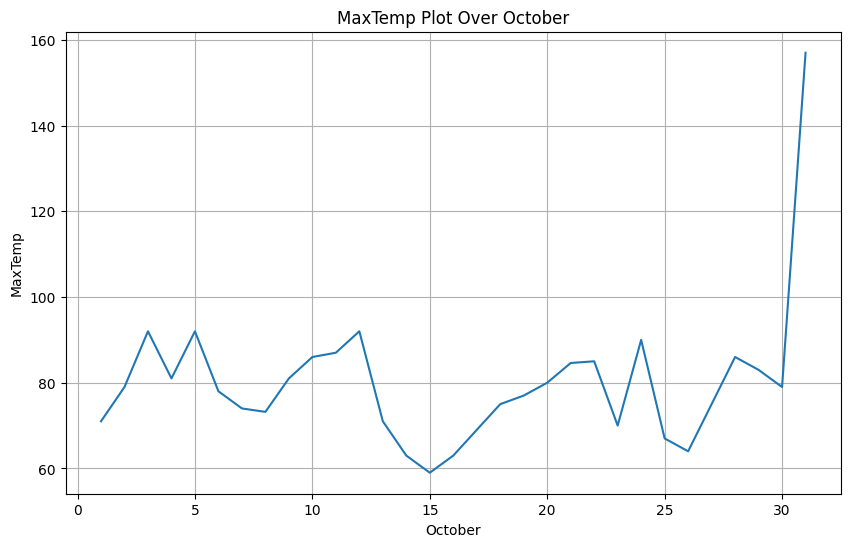

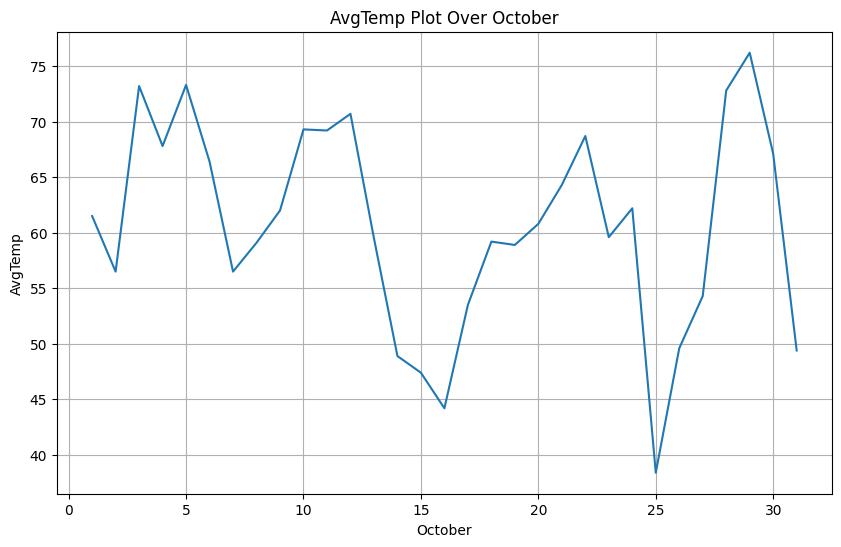

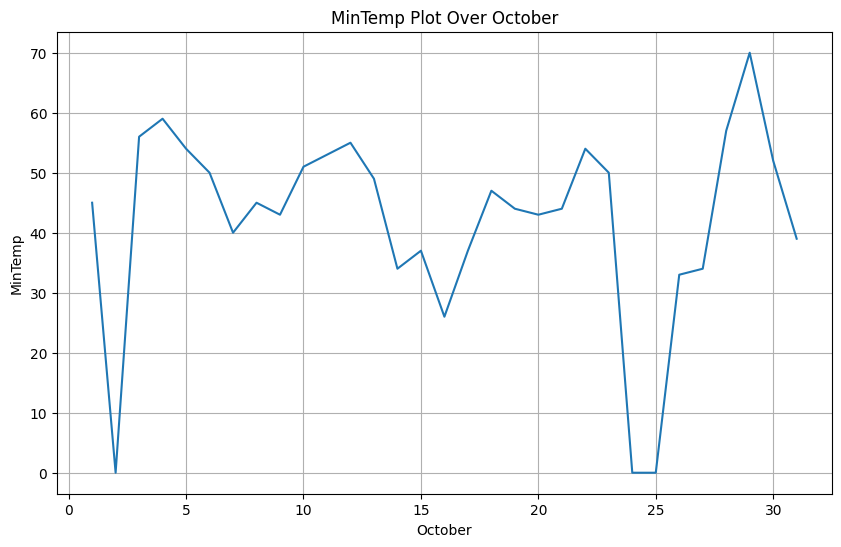

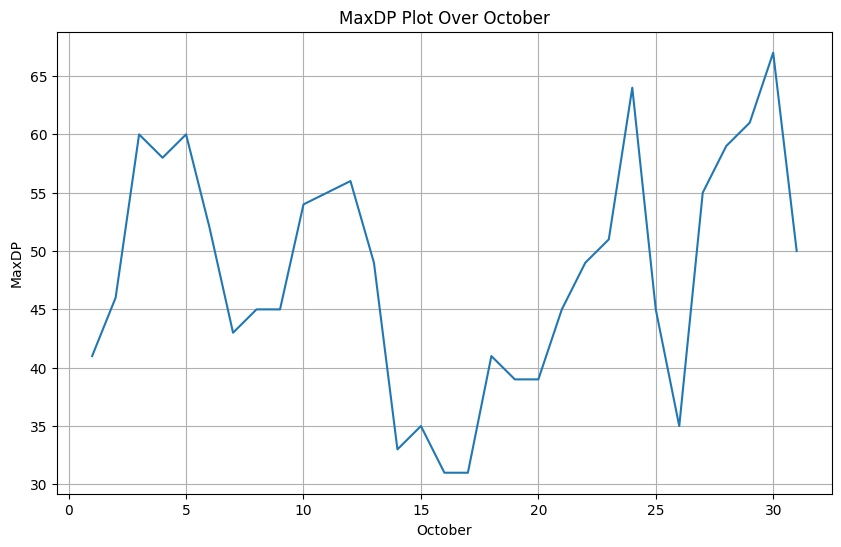

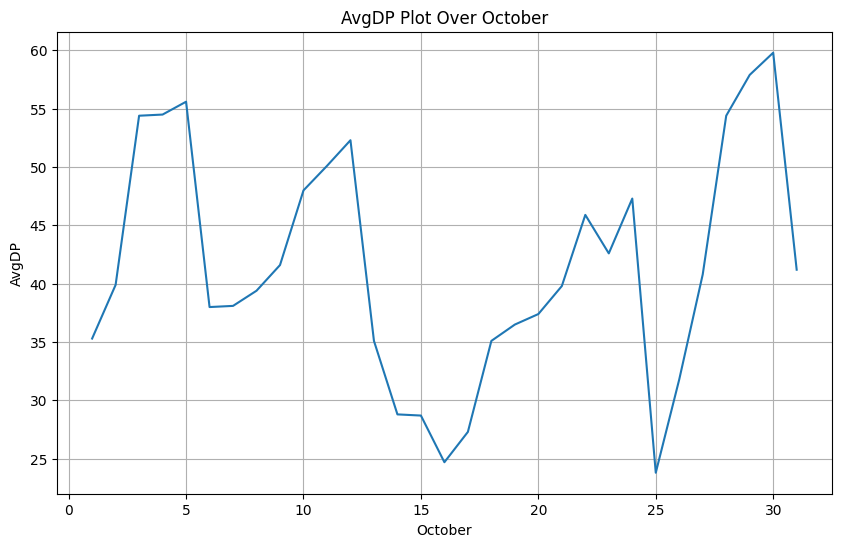

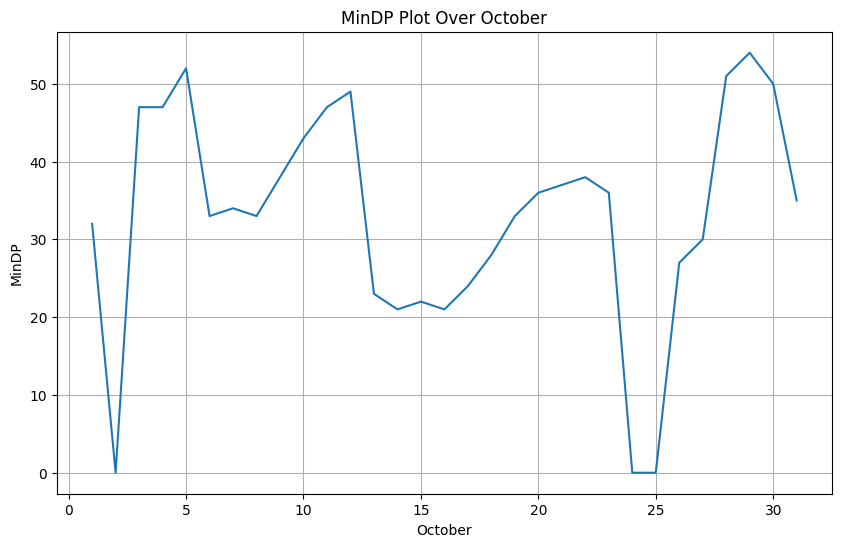

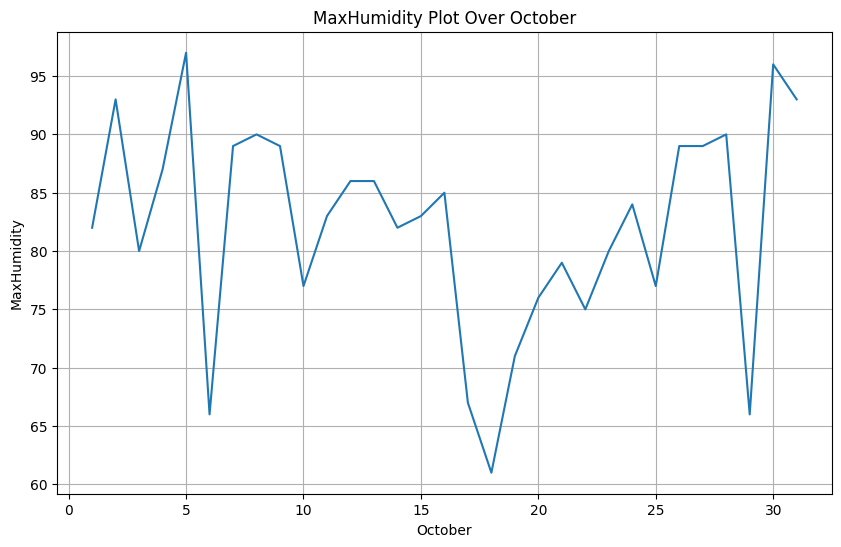

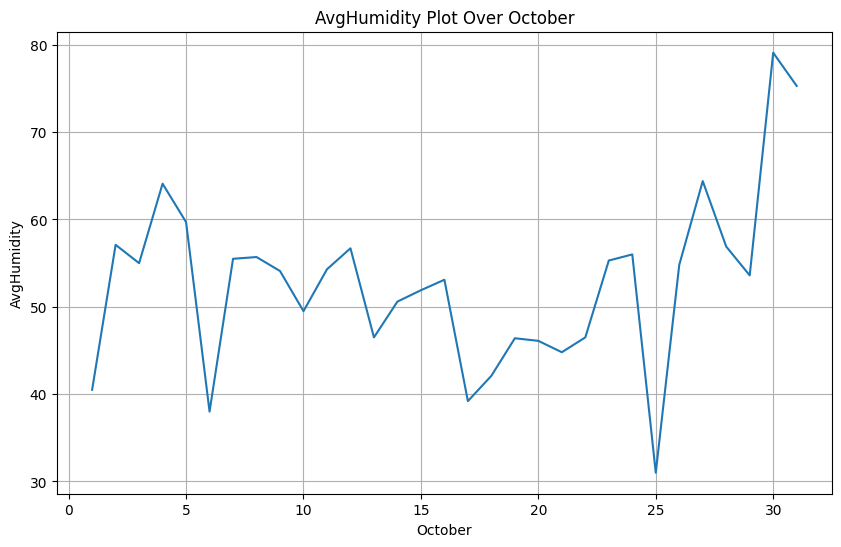

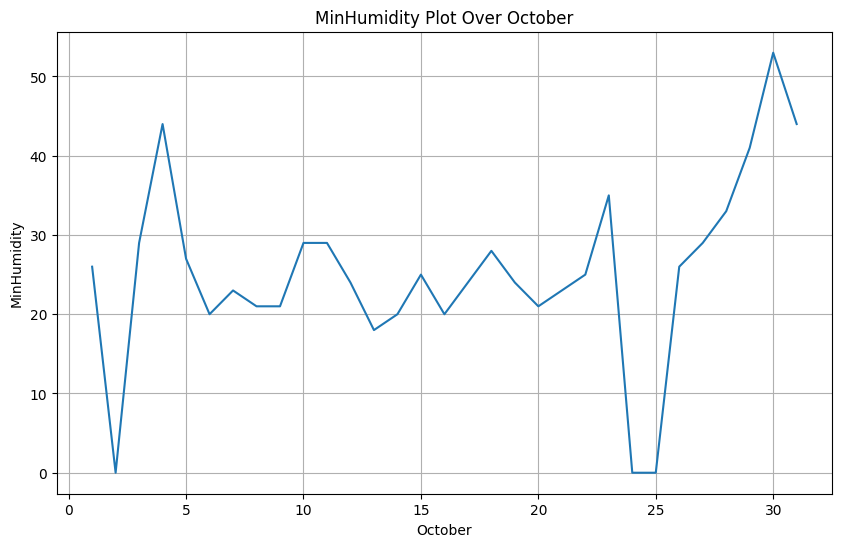

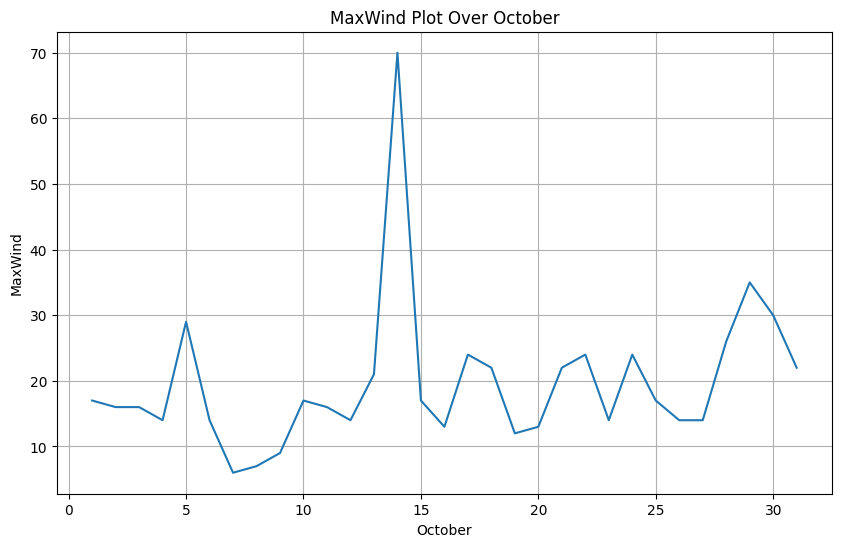

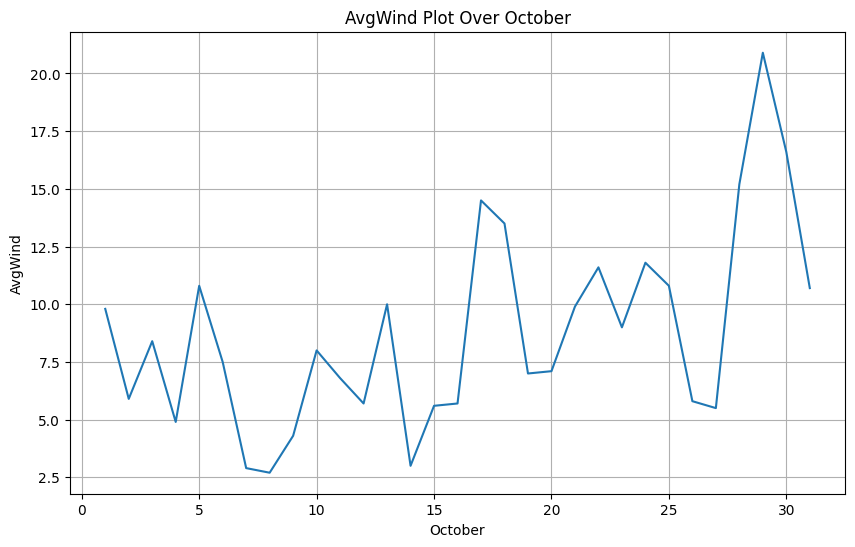

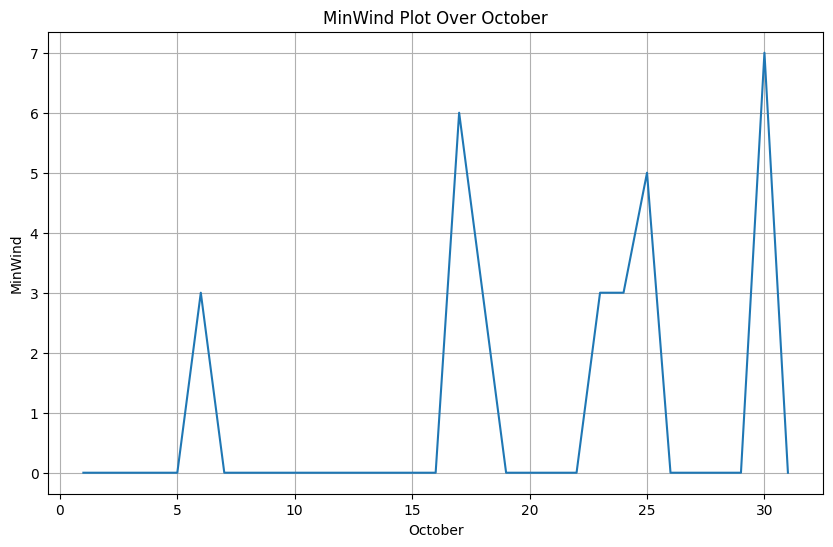

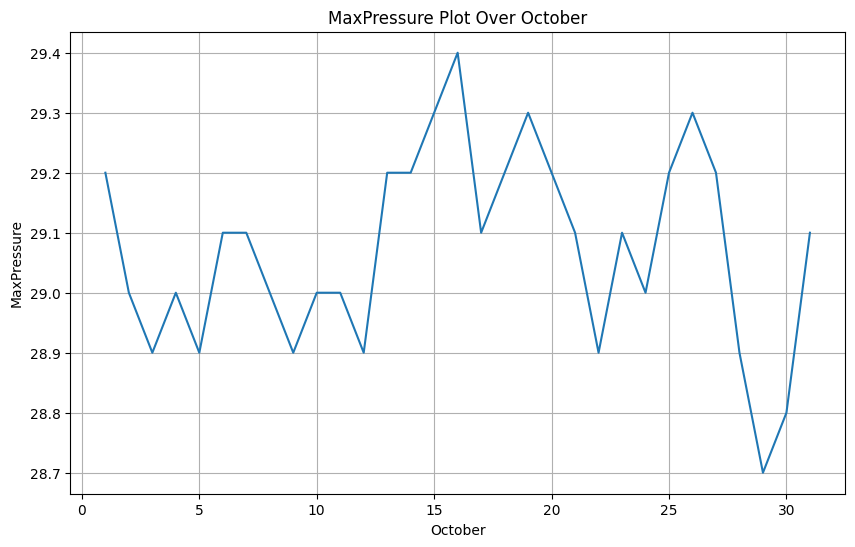

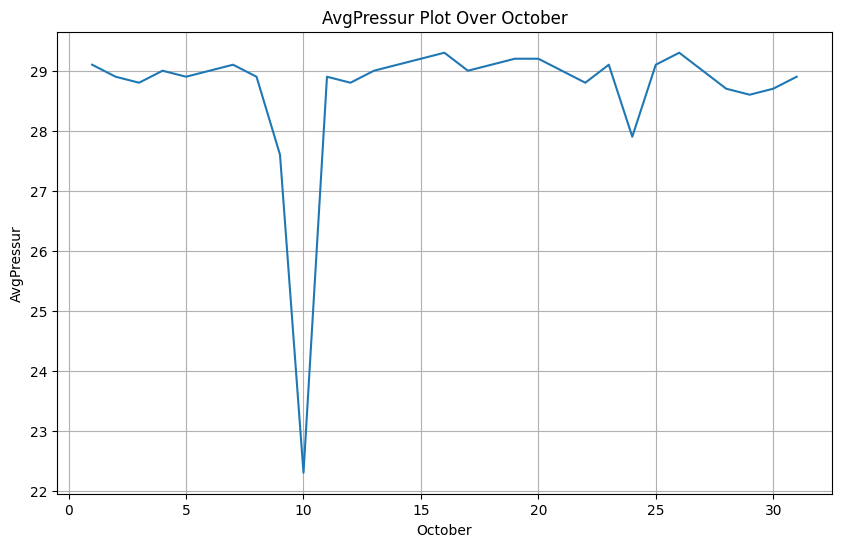

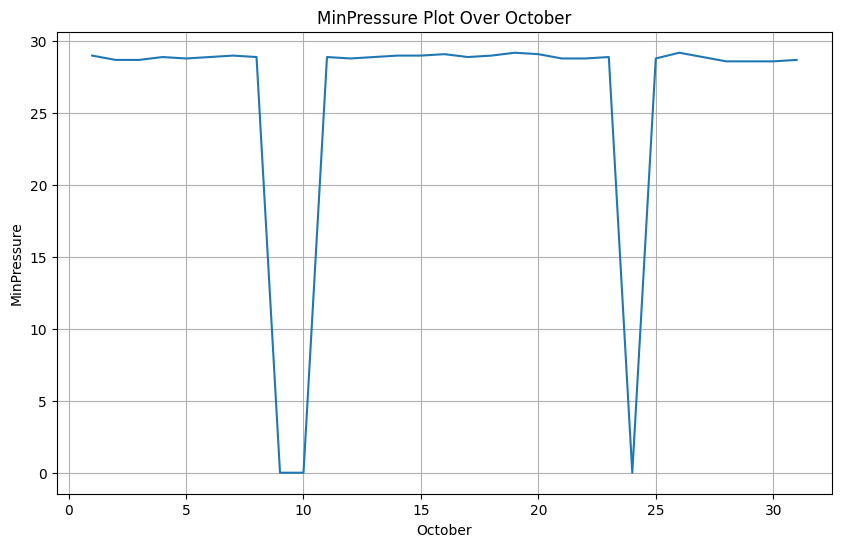

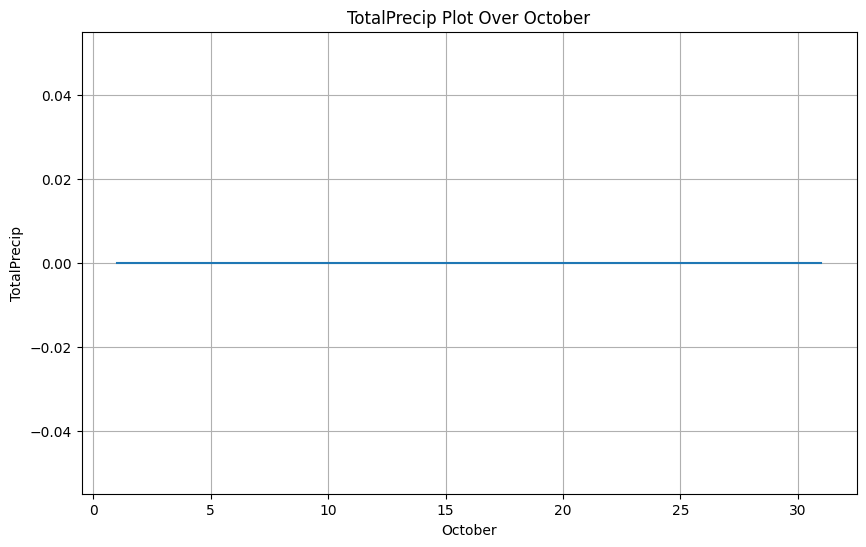

In [ ]:
# prompt: create plots for each column individuallly with values from Oct on the x-azis

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed as in the previous code

# List of columns to plot
columns_to_plot = ['MaxTemp', 'AvgTemp', 'MinTemp', 'MaxDP', 'AvgDP', 'MinDP',
                   'MaxHumidity', 'AvgHumidity', 'MinHumidity', 'MaxWind',
                   'AvgWind', 'MinWind', 'MaxPressure', 'AvgPressur',
                   'MinPressure', 'TotalPrecip']

# Create individual plots for each column
for column in columns_to_plot:
    try:
        # Convert the column to numeric, coercing errors to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')

        plt.figure(figsize=(10, 6))  # Adjust figure size if needed
        plt.plot(df['Oct'], df[column]) # Corrected: Plot against 'Oct' column
        plt.xlabel("October") # Corrected: X-axis label
        plt.ylabel(column)
        plt.title(f"{column} Plot Over October")
        plt.grid(True) # Added a grid for better readability
        plt.show()

    except KeyError:
        print(f"Error: '{column}' column not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred while plotting '{column}': {e}")


The hard part about looking for outliers in this way is that we have to look closely for values that don't make sense in their context. We can see that there are some moderately large fluctuations in our weather metrics. For instance, the average temperatures (AvgTemp) fluctuated between slightly above 75 degrees and slightly below 40 degrees. These are big fluctuations, but they're reasonable for Emporia in October. On the other hand, there might be an outlier in the maximum temperatures (MaxTemp) for October 31 when the value entered is 157. That's not only an outlier but also probably an error since there's very little chance that the temperature in Emporia actually reached 157 degrees. The same may be true for the maximum wind speed on Ocobter 14. There again the value isn't just very different from the rest of the maximum wind speeds recorded, it's also almost impossible that the wind reached a speed of 70 miles per hour.

There are several other, more effective and efficient ways to look for outliers in numerical data, but they require a more complex understanding of statistial calculations than is assumed of readers of this introductory text book. As we move into data analysis, if we need them, code and brief explainations for non-experts will be provided.

### 4.4 Conclusion

In this chapter we learned about the importance of preparing data for analaysis. Cleansing data "refers to the process of identifying errors, anomalies, and inconsistencies in the dataset" (Amit, 2024) and transforming data "refers to formatting, restructuring, and modifying the original data to a more suitable or recommeneded format" (Amit, 2024). Performing these operations helps us not only to become familiar with our data but also to know that our data are appropriate for the analyses we wish to perform in order to answer our research questions. This knowledge can be very helpful in the data collection process because it prevents us from spending a lot of effort to collect or obtain data on which we are unable to perform the analyses necessary for answering our research questions.

### References

Amit, P. (2024, February 13). Data cleaning in data science: Process, benefits and tools. UpGrad Knowledge Hut. https://www.knowledgehut.com/blog/data-science/data-cleaning

Sarih, H., Tchangani, A. P., Medjaher, K., & Pere, E. (2019). Data preparation and preprocessing for broadcast systems monitoring in PHM framework. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT), 1444–1449. https://doi.org/10.1109/codit.2019.8820370
